In [ ]:
# small notebook to visualize the results of the simulations
# not familiar enough with plotting in java
# Author: Antoine A. Ruzette 

In [3]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

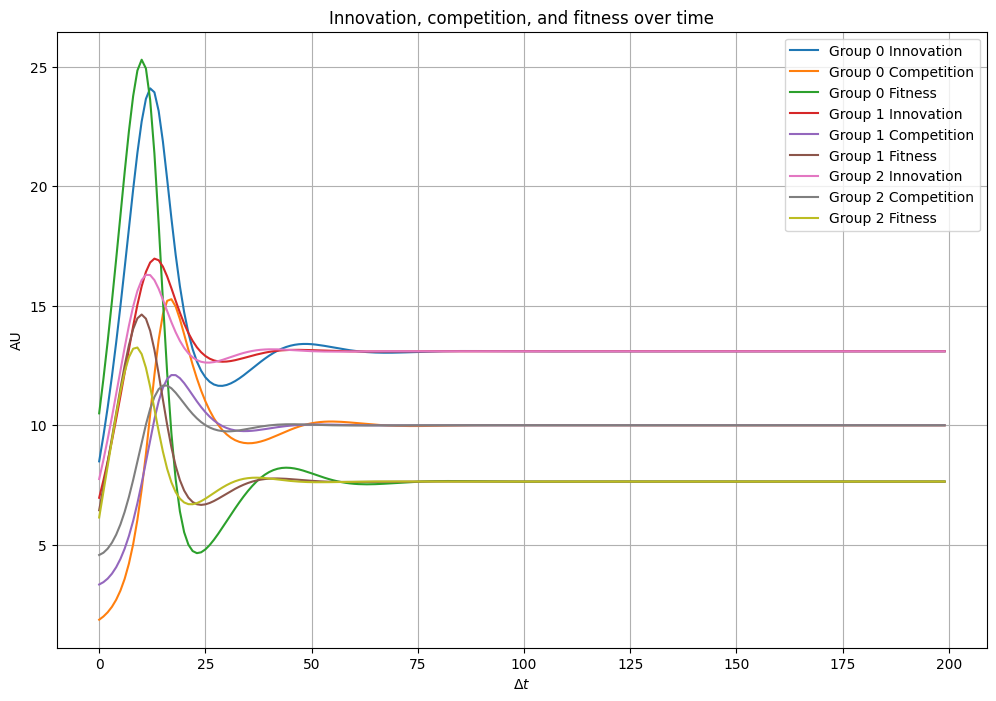

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('../data/simulation_data.csv')

# Plot Innovation, Competition, and Fitness over TimeStep for each GroupID
plt.figure(figsize=(12, 8))

for group_id in [0, 1, 2]:
    group_data = df[df['GroupID'] == group_id]
    plt.plot(group_data['TimeStep'], group_data['Innovation'], label=f'Group {group_id} Innovation')
    plt.plot(group_data['TimeStep'], group_data['Competition'], label=f'Group {group_id} Competition')
    plt.plot(group_data['TimeStep'], group_data['Fitness'], label=f'Group {group_id} Fitness')

# Adding labels and title
plt.xlabel(r'$\Delta t$')
plt.ylabel('AU')
plt.title('Innovation, competition, and fitness over time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
